In [158]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy import constants as c, units as u
from astropy import cosmology
from astropy.wcs import WCS
from scipy.ndimage.filters import gaussian_filter
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
from matplotlib.patches import Rectangle
import seaborn as sns

In [159]:
sns.set_style("ticks", {"xtick.direction": u"in", "ytick.direction": u"in"})
fontsize = 12
plt.rc("font", **{"family": "sans-serif", "serif": ["Arial"]})
plt.rc("xtick", labelsize=fontsize)
plt.rc("ytick", labelsize=fontsize)

# get images and trim
x1 = 680
x2 = 900
y1 = 680
y2 = 900

f606 = fits.open("J1059_F606W_sci.fits")
wcs606 = WCS(f606[0].header)
im606 = (
    f606[0].data[y1:y2, x1:x2]
    * f606[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f606s = fits.open("J1059_F606W_sig.fits")
sig606 = (
    f606s[0].data[y1:y2, x1:x2]
    * f606[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f606wave = f606[0].header["PHOTPLAM"]

f814 = fits.open("J1059_F814W_sci.fits")
wcs814 = WCS(f814[0].header)
im814 = (
    f814[0].data[y1:y2, x1:x2]
    * f814[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f814s = fits.open("J1059_F814W_sig.fits")
sig814 = (
    f814s[0].data[y1:y2, x1:x2]
    * f814[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f814wave = f814[0].header["PHOTPLAM"]

f125 = fits.open("J1059_F125W_sci.fits")
wcs125 = WCS(f125[0].header)
im125 = (
    f125[0].data[y1:y2, x1:x2]
    * f125[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f125s = fits.open("J1059_F125W_sig.fits")
sig125 = (
    f125s[0].data[y1:y2, x1:x2]
    * f125[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f125wave = f125[0].header["PHOTPLAM"]

f160 = fits.open("J1059_F160W_sci.fits")
wcs160 = WCS(f160[0].header)
im160 = (
    f160[0].data[y1:y2, x1:x2]
    * f160[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f160s = fits.open("J1059_F160W_sig.fits")
sig160 = (
    f160s[0].data[y1:y2, x1:x2]
    * f160[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f160wave = f160[0].header["PHOTPLAM"]

pixscale = f606[0].header["CD2_2"] * 3600 * u.arcsec


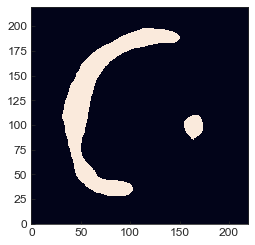

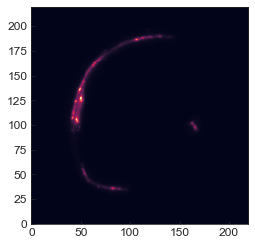

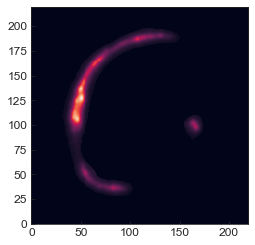

In [160]:
# make a mask to isolate the arc to do photometry
# smooth with a Gaussian filter
kernel = Gaussian2DKernel(x_stddev=2)
im606s = convolve(im606, kernel)
sig606s = convolve(sig606, kernel)
im814s = convolve(im814, kernel)
sig814s = convolve(sig814, kernel)
im125s = convolve(im125, kernel)
sig125s = convolve(sig125, kernel)
im160s = convolve(im160, kernel)
sig160s = convolve(sig160, kernel)

photmask = np.ones(np.shape(im606))
photmask[(im606s / sig606s < 2.5)] = 0


photmask[198:220, :] = 0
photmask[54:85, 64:90] = 0
photmask[59:62, 61:65] = 0
photmask[106:139, 104:148] = 0
# this mask includes arc and counterimage
# also get mask for arc only
arcmask = photmask.copy()
arcmask[80:113, 150:175] = 0

# include counter-image in photometry
includecounter = True
if includecounter:
    mask = photmask
else:
    mask = arcmask

plt.figure(num=1)
plt.clf()

plt.imshow(mask, origin="lower")

plt.figure(num=2)
plt.clf()

plt.imshow((im606 * mask).value, origin="lower")

plt.figure(num=3)
plt.clf()
plt.imshow((im160 * mask).value, origin="lower")



(220, 220)


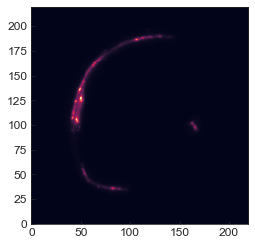

In [167]:
dat606 = (im606 * mask).value * u.erg/ u.s/ u.cm ** 2/ u.angstrom
dat814 = (im814 * mask).value * u.erg/ u.s/ u.cm ** 2/ u.angstrom
dat160 = (im160 * mask).value * u.erg/ u.s/ u.cm ** 2/ u.angstrom
dat125 = (im125 * mask).value * u.erg/ u.s/ u.cm ** 2/ u.angstrom

nc = dat606.shape[0]

plt.imshow(dat606.value,origin="lower")

print(dat814.shape)

<Magnitude -inf mag>

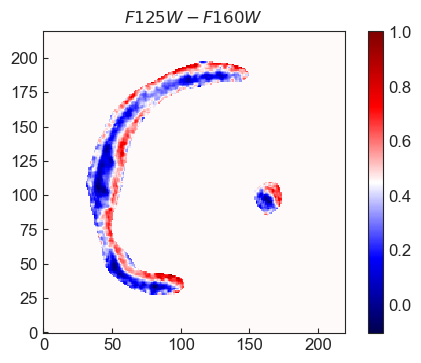

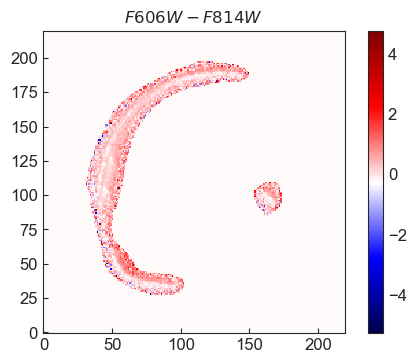

In [220]:
flam_f606w = (dat606)
flamerr_f606w = np.sqrt((sig606 ** 2 * mask).sum())
fnu_f606w = flam_f606w.to(u.uJy, equivalencies=u.spectral_density(f606wave * u.angstrom))
mab_f606w = fnu_f606w.to(u.ABmag)
fnuerr_f606w = flamerr_f606w.to(u.uJy, equivalencies=u.spectral_density(f606wave * u.angstrom))
maberr_f606w = 2.5 * np.log10(np.e) * fnuerr_f606w / fnu_f606w

flam_f814w = (dat814)
flamerr_f814w = np.sqrt((sig814 ** 2 * mask).sum())
fnu_f814w = flam_f814w.to(u.uJy, equivalencies=u.spectral_density(f814wave * u.angstrom))
mab_f814w = fnu_f814w.to(u.ABmag)
fnuerr_f814w = flamerr_f814w.to(u.uJy, equivalencies=u.spectral_density(f814wave * u.angstrom))
maberr_f814w = 2.5 * np.log10(np.e) * fnuerr_f814w / fnu_f814w

flam_f125w = (dat125)
flamerr_f125w = np.sqrt((sig125 ** 2 * mask).sum())
fnu_f125w = flam_f125w.to(u.uJy, equivalencies=u.spectral_density(f125wave * u.angstrom))
mab_f125w = fnu_f125w.to(u.ABmag)
fnuerr_f125w = flamerr_f125w.to(u.uJy, equivalencies=u.spectral_density(f125wave * u.angstrom))
maberr_f125w = 2.5 * np.log10(np.e) * fnuerr_f125w / fnu_f125w

flam_f160w = (dat160)
flamerr_f160w = np.sqrt((sig160 ** 2 * mask).sum())
fnu_f160w = flam_f160w.to(u.uJy, equivalencies=u.spectral_density(f160wave * u.angstrom))
mab_f160w = fnu_f160w.to(u.ABmag)
fnuerr_f160w = flamerr_f160w.to(u.uJy, equivalencies=u.spectral_density(f160wave * u.angstrom))
maberr_f160w = 2.5 * np.log10(np.e) * fnuerr_f160w / fnu_f160w

color_uvs = mab_f606w-mab_f814w
color_uvs1 = flam_f606w-flam_f814w
color_os = mab_f125w-mab_f160w

#a = np.array([[-2,2],[9,10]])
plt.figure(dpi=100,num=1)
plt.imshow(color_os.value,cmap="seismic",origin="lower")
plt.title(r"$F125W-F160W$")
plt.colorbar()

plt.figure(dpi=100,num=2)
plt.clf()
plt.imshow(color_uvs.value,origin="lower",cmap="seismic",label="one")
plt.title(r"$F606W-F814W$")
plt.colorbar()

np.nanmin(mab_f606w)-np.nanmax(mab_f814w)

Text(0.5, 1.0, 'F606W vs F606W-F814W')

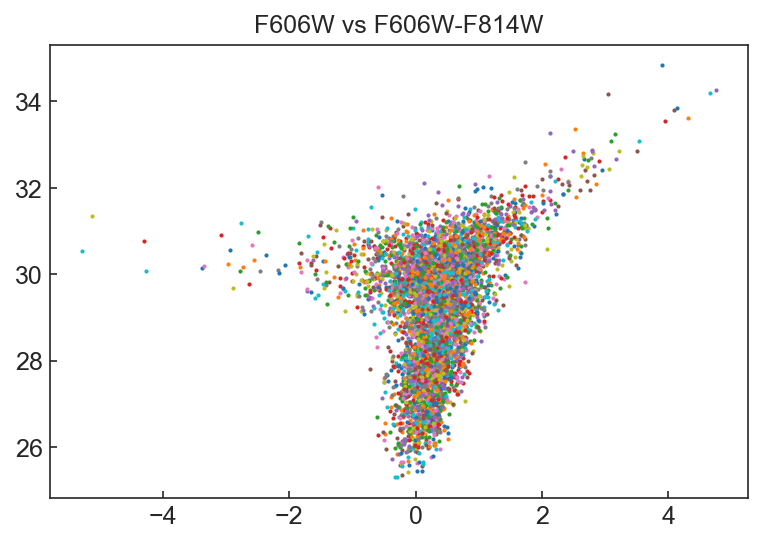

In [164]:
plt.figure(dpi=150)
plt.plot(color_uvs,mab_f606w,'.',markersize=2)
plt.title("F606W vs F606W-F814W")

0.0 erg / (Angstrom cm2 s)
-4.477578537002298e-22 erg / (Angstrom cm2 s)


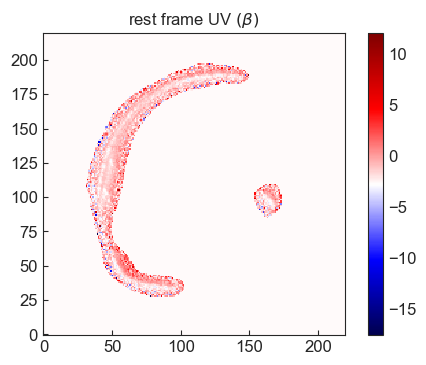

In [224]:
import matplotlib

lam606 = f606wave * u.AA
lam814 = f814wave * u.AA
#mab_f606w/mab_f814w

a1 = np.log10(flam_f606w/flam_f814w)
a2 = np.log10(lam606/lam814)
beta = np.log(flam_f606w/flam_f814w)/np.log(lam606/lam814)

masked = np.ma.array (a, mask=np.isnan(a))
plt.figure(dpi=100,num=1)
plt.clf()

cmap = matplotlib.cm.seismic
cmap.set_bad('snow',1.)
plt.imshow(beta,origin="lower",cmap=cmap,label="one")
#plt.imshow(np.log(mab_f606w.value/mab_f814w.value)/np.log(lam606/lam814),origin="lower",cmap="seismic",label="one")
plt.title(r"rest frame UV $(\beta)$")
plt.colorbar()

s1 = np.nanmin(mab_f606w.to(u.erg/u.s/u.cm**2/u.Hz))
s2 = s1 * c.c / (lam606)**2
print(s2.to(u.erg/u.s/u.cm**2/u.AA))
print(np.nanmin(flam_f606w))